# Сборный проект - 1. Анализ рынка видеоигр

**Цель проекта** - проанализировать данные по каждой игровой платформе и выявить определяющие успешность игры закономерности для планирования рекламной кампании на 2017 год.

**Задачи**:
- подготовить данные для анализа;
- провести исследовательский анализ, полученных данных;
- определить актуальный период для дальнейшего более подробного анализа;
- составить портрет пользователя каждого региона;
- проверить гипотезы;
- обобщить полученные выводы.

Для решения поставленной задачи нам предоставлены **следующие данные:**
- данные о продажах игр;
- оценки пользователей и экспертов;
- жанры 
- платформы.

## Подготовка данных

In [55]:
#импортируем необходимые библиотеки
import pandas as pd 
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import math 
import calendar
import seaborn as sns
from scipy import stats as st

In [56]:
#откроем файл с данными
df = pd.read_csv('/datasets/games.csv')
#изучим полученные данные
display(df.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


После первичной оценки полученных данных, мы можем сделать вывод о том,что:
 - есть ошибки в записи наименований столбцов;
 - присутствует большое количество пропусков;
 - есть ошибки в записи типа данных.

Более тщательную проверку мы произведем в следующем пункте данного проекта.

## Предобработка данных

In [57]:
#приведем название столбцов к нижнему регистру
df.columns = map(str.lower, df.columns)
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [58]:
#создадим универсальную функцию, которая на входе будет принимать датафрейм, а на выходе будет выводить нужные значения
def uni_function(function):
    display(function.info())
    display(function.isna().sum())
    display(function.describe())
    display(function.duplicated().sum())
uni_function(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


0

In [59]:
#посчитаем процент пропущенных значений в столбце name, genre, year_of_release
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
name,0.010000
platform,0.000000
year_of_release,1.610000
genre,0.010000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.320000
user_score,40.090000


Доля пропусков в столбцах "name" и "genre" составили меньше 1%, поэтому этими данными мы можем пренебречь. Удалим эти строки из датафрейма.

In [60]:
df = df.dropna(subset=['name', 'genre'])

Доля пропусков в столбце 'year_of_release' составила больше одного процента, значит этими данными принебрегать нельзя. Год выпуска важный параметр, поэтому пропуски заполнять не будем, т.к. неверные значения могут исказить анализ данных.

In [61]:
#преобразуем тип данных столбца 'user_score'
df['user_score'] = pd.to_numeric(df['user_score'],errors='coerce')

Столбец 'user_score' содержит информацию об оценке пользователей, соотвественно он содержит числовые значения, а значит этот столбец не может относится к типу object. В данном стобце  присутствует большое количество пропусков, мы применили метод Pandas — to_numeric(), который превращает значения столбца в числовой тип float64. При запуске этого метода была обнаружена аббревиатура tbd, что на сленге геймеров значит "будет неопределено" или "подлежит обсуждению", в обоих случаях можно сделать вывод о том, что данные пока что неизвестны. Поэтому,в связи с тем, что мы не можем самостоятельно заполнить пропущенные данные(это приведет к искажению данных), мы применили параметр errors='coerce', который принудительно заменил все некорректные значения на NaN.

In [62]:
#определим суммарные продажи во всех регионах и запишем их в отдельный столбец
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1) #суммарные продажи во всех регионах
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [63]:
#заменим неизвестные значения в столбце rating
df['rating'] = df['rating'].fillna(value='unknown')
#display(df['rating'])

**Вывод**

В результате изучения данных мы устранили всё, что могло бы помешать при дальнейшем анализе. А именно:
 - привели название столбцов к нижнему регистру;
 - изменили тип данных столбца user_score;
 - приняли решение о том, что пропущенные значения нельзя удалять или заменить каким-то другим значением.
 - удалили строки с пропущенными данными, значениями которых можно было пренебречь
 - в столбце critic_score больше 50% значений пропущенно. Принимаем решение, что пропущенные данные оставим в исходном виде.
 - в столбце rating заменили значения Nan на знаечние unknown. Так при необходимости эти значения можно быстро убрать из датасета.

## Исследовательский анализ данных

### Группировка игр по годам

In [64]:
games_per_year = df.pivot_table(
    index='year_of_release', values='total_sales', aggfunc='count')

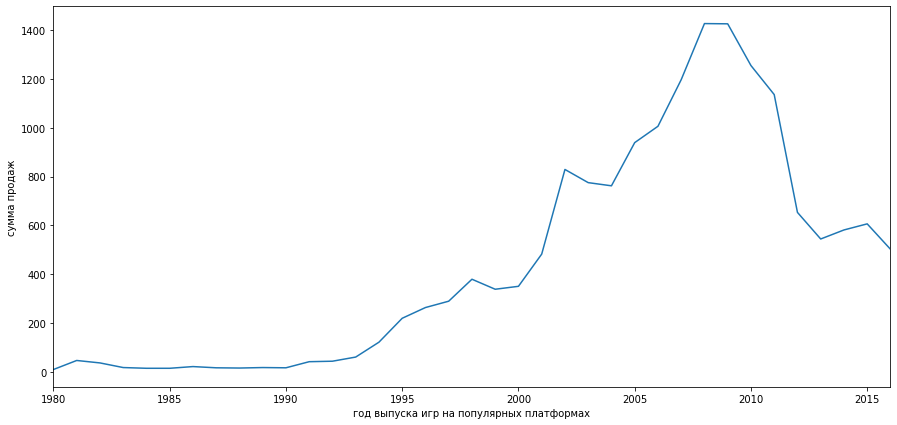

In [65]:
plt.figure(figsize = (15, 7))
plt.xlabel('год выпуска игр на популярных платформах'),
plt.ylabel('сумма продаж'),
plt.xlim(1980,2016),
plt.grid=True
sns.lineplot(data=games_per_year, 
             x='year_of_release',  
             y = 'total_sales',
)
plt.show()

После группировки данных мы можем посмотреть сколько игр было выпущенно в разные годы. По полученным данным мы можем сделать вывод о том, что наибольшее количество игр было выпущенно в период с 2006 по 2011 годы, в 2008 году был достигнут максимум. После 2008 это значение идет на спад. Вероятнее всего, спад произошел из-за экономического кризиса 2008 года.

Для определения закономерностей, определяющих успех игр, нам может пригодится период времени, в который было выпущенно наибольшее количество игр.

### Исследование продаж по платформам

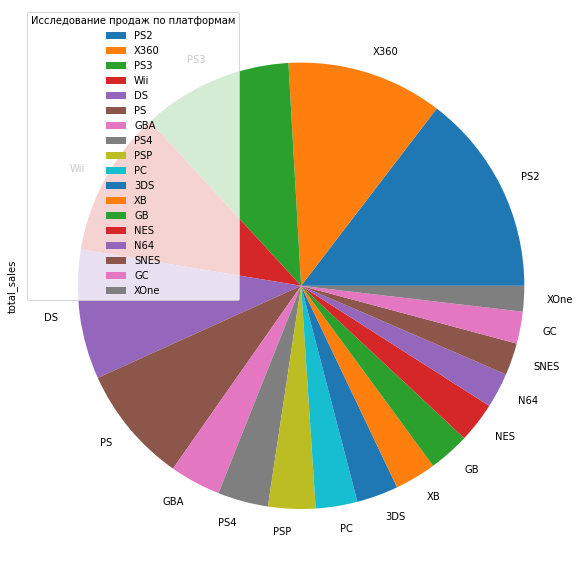

In [66]:
#исследуем зависимость продажи игр от платформы на которой они продается
#создадим сводную таблицу,в которой сгруппируем данные по столбцу 'platform'
sales_by_platform = df.pivot_table(index = 'platform', 
                                   values = 'total_sales', 
                                   aggfunc = 'sum').sort_values(by='total_sales', ascending=False)

#на графике отразим млн проданных копий
sales_by_platform = sales_by_platform.query('total_sales > 100')
sales_by_platform.plot(y = 'total_sales', kind = 'pie', figsize=(10, 15))
plt.legend(title = 'Исследование продаж по платформам')
plt.show()

По полученным данным мы можем сделать вывод о том, что платформы: PS2, X360, PS3, Wii, DS, PS имеют наибольшие суммарные продажами. Дальнейшее исследование мы будем проводить только по этим платформам.

### Анализ лидирующих по продажам платформ

In [67]:
#создадим датафрейм с лучшими платформами
df_top_platforms = df[df['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'])].reset_index(drop=True) 
display(df_top_platforms.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
3,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
4,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


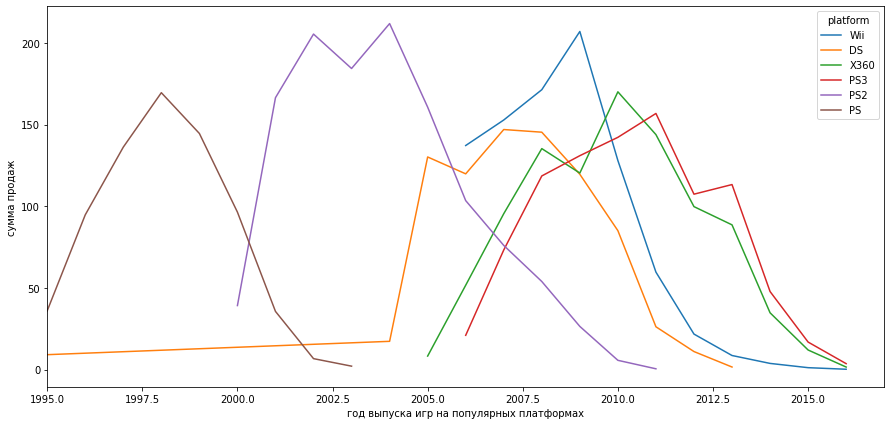

In [68]:
#построим распределение по годам
plt.figure(figsize = (15, 7))
plt.xlabel('год выпуска игр на популярных платформах'),
plt.ylabel('сумма продаж'),
plt.xlim(1995,2017),
plt.grid=True
sns.lineplot(data=df_top_platforms, 
             x='year_of_release',  
             y = 'total_sales',
             hue='platform',
             estimator = 'sum',
             ci = None
)
plt.show()

 - На графике распределения мы видим, что первой популярной платформой была DS, она начала свою работу в 1985 году. Пик продаж пришелся на 2007 год, остановка продаж произошла в 2013 году. **Срок работы платформы составил 28 лет.**
 - следующая платформа(PS) запустилась спустя 9. Пик продаж был в 1998 году, **платформа проработала 9 лет.**
 - в 2000 году появилась платформа PS2, можно предположить, что она вытеснила с рынка платформу PS. На данной платформе есть два пика продаж, в 2001 и 2004 годах. Продажи остановились в 2011 году. **Срок работы платформы составил 11 лет.** 
 - практически в одно время, появились платформы Wii(2005), X360(2006) и PS3(2006). В 2009 пик продаж был на платформе Wii и после этого продажи нашли на спад. В 2016 году продажи остановились. У платформы X360 было два пика, в 2008 и 2010 году, к 2016 продажи на платформе прератились. У PS3 было два пика, в 2012 и 2013 году, к 2016 продажи на платформе прератились. **Срок работы платформы Wii - 11 лет. Срок работы платформы X360 - 10 лет. Срок работы платформы PS3 - 10 лет.**

**Вывод**

Платформа долгожитель - платформа DS. Исходя из данных о других платформах, мы можем сделать вывод о том, что в среднем платформы работают в течение 10 лет. Также, ранее мы определили, что лучший период продаж был с 2006 по 2011 годы, значит мы можем исключить платформу PS из исследования, т.к. продажи прекратились до 2006 года. 

### Анализ платформ в выбранный актуальный период

Для того, чтобы построить прогноз на 2017 год, нам нужно проализировать ситуацию по продажам на платформах за последние два года.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
1,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
2,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
3,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
4,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39


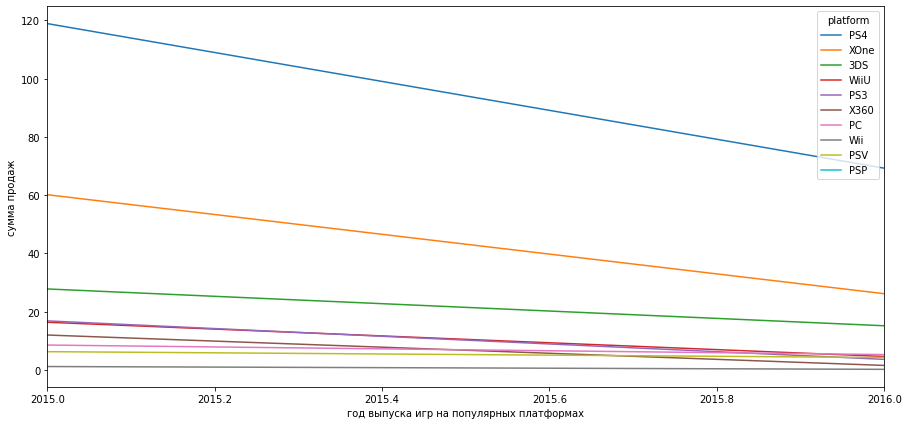

In [69]:
#создадим датафрем с актуальными данными
df_actual = df.query('year_of_release>2014').reset_index(drop=True)
display(df_actual.head())
#построим график продаж
#построим распределение по годам
plt.figure(figsize = (15, 7))
plt.xlabel('год выпуска игр на популярных платформах'),
plt.ylabel('сумма продаж'),
plt.xlim(2015,2016),
plt.grid=True
sns.lineplot(data=df_actual, 
             x='year_of_release',  
             y = 'total_sales',
             hue='platform',
             estimator = 'sum',
             ci = None
)

plt.show()

Исходя из графика мы видим, что потенциально прибыльными платформами являются PS4,XOne,3DS. В 2015 году у этих трех платформ были самые высокие продажи. Снижение продаж на платформе 3DS идет медленно и равномерно, есть вероятность, что при правильном выборе продукта и спланированной рекламной компании эта платформа сможет продержаться на плаву. Также стоит отметить, что к 2016 году на остальных платформах продажи либо остановились, либо приблизись к нулю.

### График "ящик с усами" по глобальным продажам игр в разбивке по платформам за актуальный период

(0.0, 2.0)

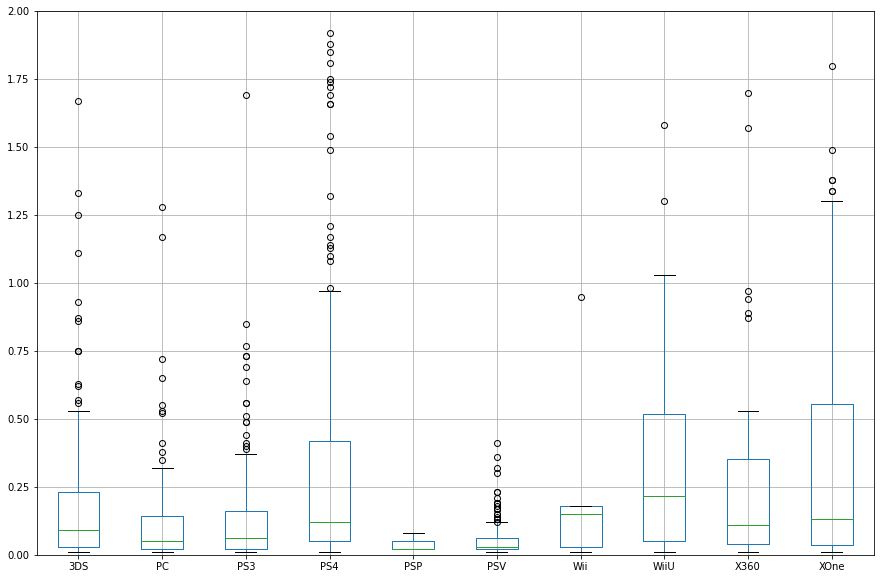

In [70]:
#построим график "ящик с усами" по глобальным продажам игр 
df_actual.pivot_table(index = ['name'], 
               columns = 'platform',
               values = 'total_sales', 
               aggfunc = 'sum').reset_index().boxplot(figsize = (15, 10))
plt.ylim(0, 2)

При анализе графика мы видим, что наиболее успешные игры выпускались на платформах 3DS, PS4, X0ne. На данных платформах есть игры у которых количество проданных экземпляров привышает 6тясяч копий, а на платфоре PS4 игра была продана более 14 тысяч раз, это Call of Duty: Black Ops 3. Судя по графику наибольшее значение медианы было на платформе WiiU, также можно отметить платформы 3DS,PS4,Wii,WiiU,X360,XOne. 


### Анализ влияния отзывов пользователей и критиков на продажи 

Для анализа мы выбираем потенциально прибыльную платформу - PS4. Рассмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и
посчитаем корреляцию между отзывами и продажами.

In [71]:
#создадим новый датафрейм с данными платформы PS4
df_ps4 = df_actual.query('platform == "PS4"').reset_index(drop=True)
display(df_ps4.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
1,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
2,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
3,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
4,Fallout 4,PS4,2015.0,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


In [72]:
#посчитаем процент пропущенных значений в столбце critic_score, user_score
pd.DataFrame(round((df_ps4[['critic_score', 'user_score']].isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
critic_score,38.540000
user_score,36.880000


Процентрая доля пропусков в обоих столбцах достаточно высокая. Заполнить пропуски самостоятельно мы не можем, поэтому будем проводить анализ по исходным данным.

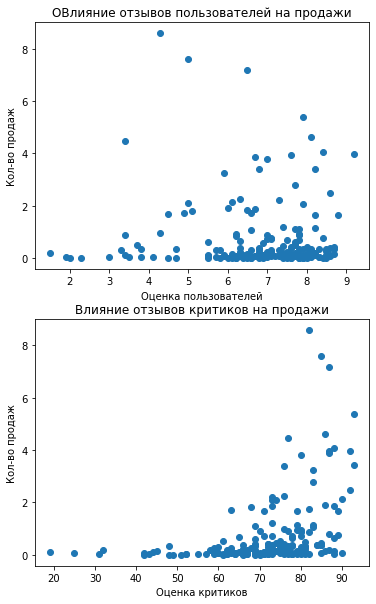

Корреляция между отзывами пользователей и продажами составила: -0.05973845712638215
Корреляция между отзывами критиков и продажами составила: 0.3928485555130601


In [73]:
fig, ax = plt.subplots(2,figsize=(6,10))

ax[0].scatter(x = df_ps4['user_score'], y = df_ps4['total_sales'])
ax[0].set_xlabel('Оценка пользователей')
ax[0].set_ylabel('Кол-во продаж')
ax[0].set_title('ОВлияние отзывов пользователей на продажи')


ax[1].scatter(x = df_ps4['critic_score'], y = df_ps4['total_sales'])
ax[1].set_xlabel('Оценка критиков')
ax[1].set_ylabel('Кол-во продаж')
ax[1].set_title('Влияние отзывов критиков на продажи')

plt.show()

correlation_user = df_ps4['total_sales'].corr(df_ps4['user_score'])
correlation_critic = df_ps4['total_sales'].corr(df_ps4['critic_score'])
print('Корреляция между отзывами пользователей и продажами составила:', correlation_user)
print('Корреляция между отзывами критиков и продажами составила:', correlation_critic)


**Вывод**
Мы знаем, что коэффициент Пирсона отрицательный, если рост одной  величины связан с уменьшением другой, а также что, если значение близко к нулю, линейная связь слабая либо отсутсвует вовсе. Значит, отзывы пользователей слабо влияют на количество продаж.

В случае с отзывами критиков и количеством продаж, мы можем сделать вывод о том, что линейная связь есть, но не очень сильная.Коэффициент Пирсона положительный, а значит, с ростом первой величины растет вторая.

### Рассмотрим зависимость отзывов от продаж для других популярных платформ

In [74]:
#напишем универсальную функцию, которая будет выводить значения для каждой платформы
def score_function(name_platform):
    df_platform = df_actual.query('platform == @name_platform')
    fig, ax = plt.subplots(2,figsize=(6,10))
    
    ax[0].scatter(x = df_platform['user_score'], y = df_platform['total_sales'])
    ax[0].set_xlabel('Оценка пользователей')
    ax[0].set_ylabel('Кол-во продаж')

    ax[1].scatter(x = df_platform['critic_score'], y = df_platform['total_sales'])
    ax[1].set_xlabel('Оценка критиков')
    ax[1].set_ylabel('Кол-во продаж')
    
    correlation_user = df_platform['total_sales'].corr(df_platform['user_score'])
    correlation_critic = df_platform['total_sales'].corr(df_platform['critic_score'])
    print('Корреляция между отзывами пользователей и продажами составила:', correlation_user)
    print('Корреляция между отзывами критиков и продажами составила:', correlation_critic)
   

Корреляция между отзывами пользователей и продажами составила: 0.36351857248094444
Корреляция между отзывами критиков и продажами составила: 0.31704571176962204


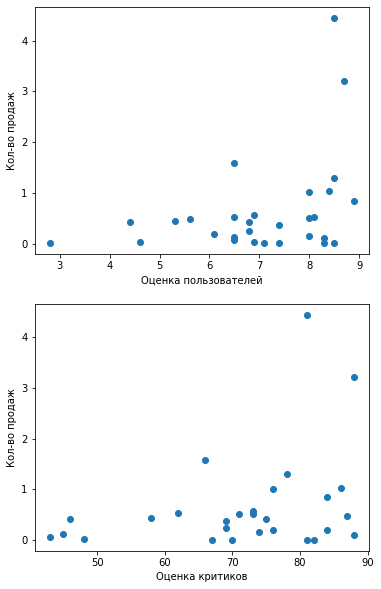

In [75]:
#для платформы WiiU
score_function('WiiU') 

Корреляция между отзывами пользователей и продажами составила: 0.19879627008102985
Корреляция между отзывами критиков и продажами составила: 0.17757455046092874


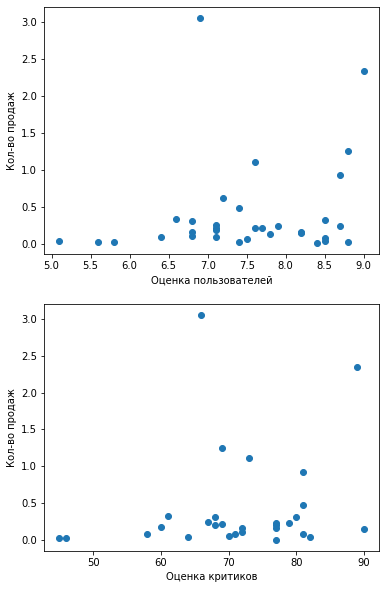

In [76]:
#для платформы 3DS
score_function('3DS') 

Как мы видим, и для других потенциально прибыльных платформ коэффициент Пирсона близок к нулю, что говорит о слабой линейной связи величин. Поэтому мы можем сделать вывод о том, что отзывы критиков и пользователей практически не влияют на продажи.

### Анализ общего распределение игр по жанрам

In [77]:
#посмотрим на общее распределение игр по жанрам
df_actual['genre'].value_counts() 

Action          431
Role-Playing    132
Adventure       110
Sports          107
Shooter          81
Misc             71
Racing           42
Fighting         37
Simulation       33
Strategy         29
Platform         28
Puzzle            7
Name: genre, dtype: int64

In [78]:
#определим долю игр в жанре action
action_games = df_actual[df_actual['genre']=='Action']['genre'].count()
action_games_share = action_games/df_actual.shape[0]
print(f'Доля action_games в столбце genre составляет: {action_games_share:.1%}')

Доля action_games в столбце genre составляет: 38.9%


Судя по полученным данным мы можем сделать вывод о том, что самыми популярными жанрами являются: Action, Role-Playing и Adventure. В этих жанрах выпускается наибольшее количество игр.

#### Определим самые прибыльные жанры

Т.к. количество игр разное для каждогожанра, суммарную прибыль считать мы не будем, ведь чем больше игр в определенном жанре, тем больше прибыль. Поэтому посчитаем прибыль в среднем для каждого жанра.

In [79]:
df_actual.pivot_table(index='genre', values='total_sales', aggfunc='mean').sort_values(by='total_sales',ascending=False)

,total_sales
genre,
Shooter,1.305309
Sports,0.601215
Role-Playing,0.422879
Fighting,0.334324
Platform,0.331429
Racing,0.258571
Action,0.236961
Simulation,0.228788
Misc,0.199577


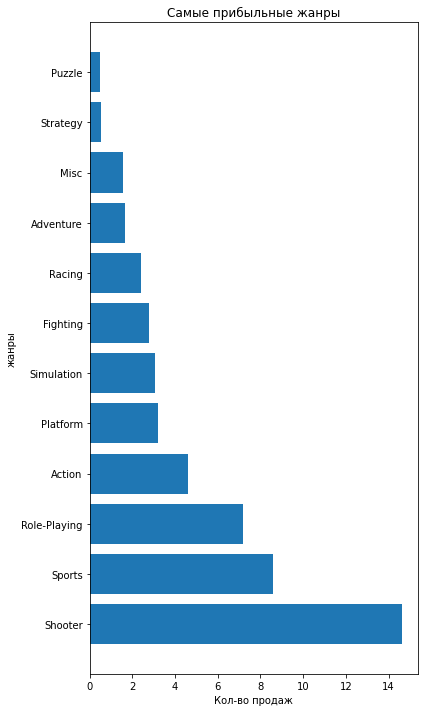

In [80]:
fig, ax = plt.subplots(figsize=(6,10))

ax.barh(df_actual.genre, df_actual.total_sales)
ax.set_title('Самые прибыльные жанры')
ax.set_ylabel('жанры')
ax.set_xlabel('Кол-во продаж')
plt.tight_layout()

По расчетам видно, что самыми прибыльными жанрами можно считать: Shooter, Sports и Role-Playing.
Наименнее прибыльные жанры: Strategy, Puzzle, Misc.	

Возможно данные жанры игр попуkярны, потому что позволяют выплеснуть энергию, особо не прилагая умственных способностей, "разгрузить мозг", "сбросить напряжение". Для многих игры как раз и являютс средством отдыха.

## Портрета пользователя каждого региона

### Самых популярные платформы для каждого региона. Различия в долях продаж.

In [81]:
def popular_platform(quality, region):
    result = df_actual.pivot_table(index=quality, values=[region, 'total_sales'], aggfunc='sum').sort_values(by=region,ascending=False).reset_index()
    result['share'] = round(result[region]/result['total_sales'],2)
    return result.head()

In [82]:
# доля продаж в Северной Америке
na_share = popular_platform('platform', 'na_sales')

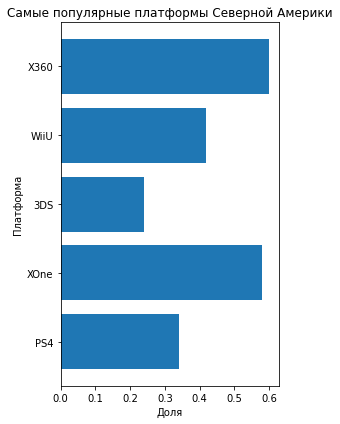

In [83]:
#построим горизонтальную столбчатую диаграмму
fig, ax = plt.subplots(figsize=(4,6))

ax.barh(na_share.platform, na_share.share)
ax.set_title('Самые популярные платформы Северной Америки')
ax.set_ylabel('Платформа')
ax.set_xlabel('Доля')
plt.tight_layout()

**Северная Америка**
- самыми популярными платформами в Северной Америке являются:  PS4, XOne, 3DS, Wii X360;
- доля продаж в Северной Америке от общей доли продаж для платформ XOne	и X360 составила 60%;
- для платформы WiiU доля продаж составила 40%;
- для платформы PS4	 - 30%;
- для платформы 3DS	 - 20%.

Таким образом, мы видим, что самыми популярными в Северной Америке являются платформы американской компании Microsoft.

In [84]:
#продажи в Европе
eu_share = popular_platform('platform', 'eu_sales')

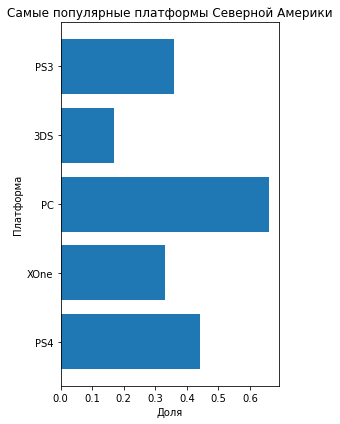

In [85]:
#построим горизонтальную столбчатую диаграмму
fig, ax = plt.subplots(figsize=(4,6))

ax.barh(eu_share.platform, eu_share.share)
ax.set_title('Самые популярные платформы Северной Америки')
ax.set_ylabel('Платформа')
ax.set_xlabel('Доля')
plt.tight_layout()

**Европа**

- самыми популярными платформами в Европе являются: PS4, XOne, PC, 3DS, PS3;
- доля продаж в Европе от общей доли продаж для платформы PC составила 70%;
- для платформ PS4 и PS3  доля продаж составила 40%;
- для платформы XOne - 30%;
- для платформы 3DS - 20%.

Делаем вывод о том, что в Европе самой прибыльной платформой является платорма PC.

In [86]:
#продажи в Японии
jp_share = popular_platform('platform', 'jp_sales')

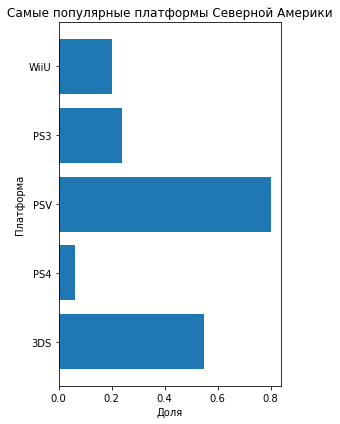

In [87]:
#построим горизонтальную столбчатую диаграмму
fig, ax = plt.subplots(figsize=(4,6))

ax.barh(jp_share.platform, jp_share.share)
ax.set_title('Самые популярные платформы Северной Америки')
ax.set_ylabel('Платформа')
ax.set_xlabel('Доля')
plt.tight_layout()

**Япония**

- самыми популярными платформами в Япониие являются: 3DS, PS4, PSV,	PS3, WiiU;
- доля продаж в Японии от общей доли продаж для платформы PSV составила 80%;
- для платформы 3DS доля продаж составила 50%;
- для платформ PS3 и WiiU - 20%;
- для платформ PS4 - 10%.

Делаем вывод о том, что в Японии самой прибыльной платформой является платорма японской компании Sony.

### Самые популярные жанры (топ-5).

In [88]:
# в Северной Америке
na_genre = popular_platform('genre', 'na_sales')
display(na_genre)

,genre,na_sales,total_sales,share
0,Shooter,48.18,105.73,0.46
1,Action,33.68,102.13,0.33
2,Sports,26.31,64.33,0.41
3,Role-Playing,19.82,55.82,0.36
4,Misc,5.58,14.17,0.39


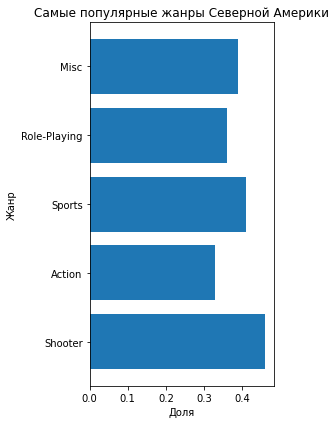

In [89]:
#построим горизонтальную столбчатую диаграмму
fig, ax = plt.subplots(figsize=(4,6))

ax.barh(na_genre.genre, na_genre.share)
ax.set_title('Самые популярные жанры Северной Америки')
ax.set_ylabel('Жанр')
ax.set_xlabel('Доля')
plt.tight_layout()

**Северная Америка**
- самыми популярными жанрами в Северной Америке являются: Action, Shooter, Sports, Role-Playing и Misc;
- доля продаж в Северной Америке от общей доли продаж для жанра Shooter составила 50%;
- для жанров Sports, Role-Playing и Misc доля продаж составила 40%;
- для жанра Action - 30%.

In [90]:
# в Европе
eu_genre = popular_platform('genre', 'eu_sales')
display(eu_genre)

,genre,eu_sales,total_sales,share
0,Shooter,40.28,105.73,0.38
1,Action,34.82,102.13,0.34
2,Sports,27.82,64.33,0.43
3,Role-Playing,17.21,55.82,0.31
4,Racing,6.52,10.86,0.60


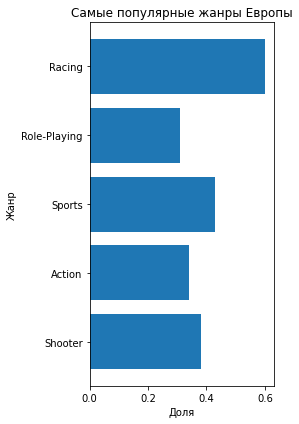

In [91]:
#построим горизонтальную столбчатую диаграмму
fig, ax = plt.subplots(figsize=(4,6))

ax.barh(eu_genre.genre, eu_genre.share)
ax.set_title('Самые популярные жанры Европы')
ax.set_ylabel('Жанр')
ax.set_xlabel('Доля')
plt.tight_layout()

**Европа**
- самыми популярными жанрами в Европе являются: Shooter, Action, Sports, Role-Playing и Racing;

- доля продаж в Европе от общей доли продаж для жанра Racing составила 60%;
- для жанров   Shooter и Sports - 40%.
- для жанров Action и Role-Playing   - 30%.

In [92]:
# в Японии
jp_genre = popular_platform('genre', 'jp_sales')
display(jp_genre)

,genre,jp_sales,total_sales,share
0,Action,23.05,102.13,0.23
1,Role-Playing,13.41,55.82,0.24
2,Shooter,3.79,105.73,0.04
3,Misc,3.19,14.17,0.23
4,Adventure,2.22,11.98,0.19


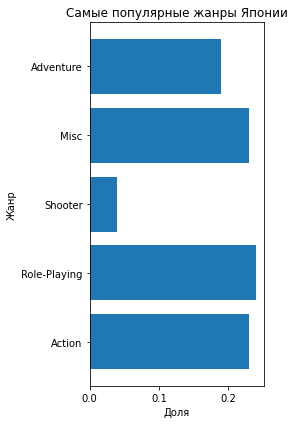

In [93]:
fig, ax = plt.subplots(figsize=(4,6))

ax.barh(jp_genre.genre, jp_genre.share)
ax.set_title('Самые популярные жанры Японии')
ax.set_ylabel('Жанр')
ax.set_xlabel('Доля')
plt.tight_layout()

**Япония**
- самыми популярными жанрами в Японии являются: Action, Role-Playing, Shooter, Misc и Adventure;
- доля продаж в Японии от общей доли продаж для жанров Action, Role-Playing, Misc, Adventure составила 20%;
- для жанра Shooter - 4%.

**Вывод**
- Во всех трех странах среди популярных жарнов присутствуют Shooter, Action и Role-Playing.
- В Европе и Северной Америке жанровые предпочтения практически совпадают: Action, Shooter, Sports, Role-Playing, а также для Северной Америки - Misc, для Европы - Racing. 
- Большая часть пользователей предпочитающих жанры Action, Shooter, Sports прожавают в Северной Америке и Европе. 
- Вкусы пользователей Японии отличаются от пользователей Европы и Северной Америки.в отличие от других стран здесь популярны такие жанры как: Misc и Adventure.

###  Влияние рейтинга ESRB на продажи в отдельном регионе

In [94]:
# оценим какие варианты рейтинга присутствуют в столбце
df_actual['rating'].value_counts()

unknown    513
T          192
E          153
M          149
E10+       101
Name: rating, dtype: int64

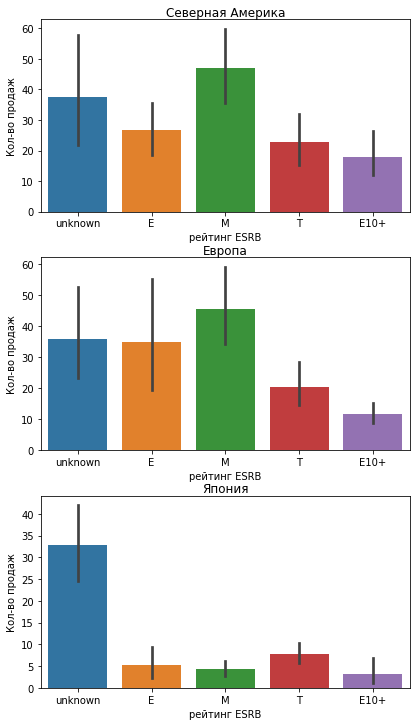

In [95]:
#построим столбчатую диаграмму распределения продаж в зависимоти от рейтинга
fig, ax = plt.subplots(3, figsize=(6,10))

sns.barplot(data=df_actual, ax=ax[0], x = 'rating', y = 'na_sales', estimator=np.sum)
ax[0].set_title('Северная Америка', pad=-1)
ax[0].set_xlabel('рейтинг ESRB')
ax[0].set_ylabel('Кол-во продаж')
plt.tight_layout()
#Европа
sns.barplot(data=df_actual, ax=ax[1], x = 'rating', y = 'eu_sales', estimator=np.sum )
ax[1].set_title('Европа', pad=-1)
ax[1].set_xlabel('рейтинг ESRB')
ax[1].set_ylabel('Кол-во продаж')
#Япония
sns.barplot(data=df_actual,ax=ax[2], x = 'rating', y = 'jp_sales', estimator=np.sum )
ax[2].set_title('Япония', pad=-1)
ax[2].set_xlabel('рейтинг ESRB')
ax[2].set_ylabel('Кол-во продаж')

plt.show()

**Вывод**

Исходя  из графиков нельзя сделать вывод о том, как влияет рейтинг ESRB на продажи. Мы видим, что большое количество игр вообще не имеет оценки и это очень сильно влияет на распределение на графиках.

Данные графики скорее подтверждают полученные нами результаты в пункте 3.6(Анализ влияния отзывов пользователей и критиков на продажи): рейтинг ESRB не влияет на продажи на платформах.


Возможно, популярность игр без рейтинга в Японии связано с тем, что к играм с рейтингом применяется сильная цензура и действиют сильные ограничения.

## Проверка гипотиз

Проверим две гипотезы:
 * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 * Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Формулировка гипотезы №1**

Типичные статистические гипотезы касаются средних значений
генеральных совокупностей и звучат так:
 * среднее генеральной совокупности равно конкретному значению;
 * средние двух генеральных совокупностей равны между собой.

H₀ всегда формулируется так, чтобы использовать знак равенства.В нашем случае нам подходит второй вариант. 

**Нулевая гипотеза H₀ будет звучать так:** Средние пользовательские рейтинги платформ Xbox One и PC равны.

Исходя из H₀ формулируется альтернативная гипотеза H₁.

**Альтернативная гипотеза H₁:** Средние пользовательские рейтинги платформ Xbox One и PC различаются

**критический уровень статистической значимости** alpha=0.05


In [96]:
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу
results = st.ttest_ind(
    df_actual.query('platform == "PC"')['user_score'].dropna(), 
    df_actual.query('platform == "XOne"')['user_score'].dropna()
    ) 
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.2778542084733835
Не получилось отвергнуть нулевую гипотезу


**Вывод**

По результатам тестирования мы не можем опровергнуть нулевую гипотезу,а значит гипотеза о том, что cредние пользовательские рейтинги платформ Xbox One и PC равны не подтвердилось.

**Нулевая гипотеза H₀ будет звучать так:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны.

Исходя из H₀ формулируется альтернативная гипотеза H₁.

**Альтернативная гипотеза H₁:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») различаются.

**критический уровень статистической значимости** alpha=0.05


In [97]:
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу
results = st.ttest_ind(
    df_actual.query('genre == "Action"')['user_score'].dropna(), 
    df_actual.query('genre == "Sports"')['user_score'].dropna()
    ) 
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.0012846807938657e-13
Отвергаем нулевую гипотезу


**Вывод**

Мы отвергаем нулевую гипотезу, а значит альтернативная гипотеза оказалась верной. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») различаются.

## Общий вывод

В данном проекте для выявления потенциально популярного продукта мы проделали следующие шаги:
1. Подготовили исходные данные, а именно, поработали с пропусками, привели названия столбцов к правильному виду, изменили тип данны некоторы столбцов, посчитали суммарные продажи во всех регионах и создали новый столбец с этими данными
2. На втором этапе анализа мы определили период времени, который поможет нам построить прогноз на 2017 год. Был выбран период с 2015 по 2016 год.
3. На третьем этапе мы приступили к более масштабному анализу данных:
- Определили потенциально прибыльные платформы(PS4,XOne,3DS);
- С помощью графика по глобальным продажам игр по платформам выявили на каких платформах было продано больше всего игр (PS2, X360, PS3, Wii, DS, PS). Мы видим, что ниодна из этих платформ не присутствуют в нашем списке потенцально прибыльных;
- Определили, что отзывы критиков и пользователей практически не влияют на продажи;
- Определили самые прибыльные жанры: Shooter, Sports и Role-Playing.
4. На следующем эпате нам нужно было посмотреть, какая ситуаиця в каждом регионе. Какие платформы популярны, какие жанры игр предпочитают пользователи данных регионов.
- в Северной Америке самыми популярными платформами является платформы американской комнапии Microsoft;
- В Европе популярна пратформа PC. В Японии платформа японской компании Sony.
- Определили, что жанровые предпочтения в Северной Америке и Европе совпадают. Это игры в жанрах Action, Shooter, Sports, Role-Playing, а также для Северной Америки - Misc, для Европы - Racing. 
- Вкусы пользователей Японии отличаются. Помимо  Action, Shooter и Role-Playing здесь популярны такие жанры как: Misc и Adventure.
- Также мы выяснили что рейтинг ESRB не влияет на продажи в регионах. 
5. Заключительным эпатом нашего исследования была проверка гипотез. Так мы определили, что: 
- равенство cредних пользовательских рейтингов платформ Xbox One и PC не подтвердилось;
- средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») различаются. 

Опираясь на полученные данные, мы точно можем сделать вывод о том, что продажи абсолютно на всех платформах падают. Возможно это связано с развитием игр на мобильных телефонах, возможно роль также сыграли оценки критиков, которые часто не соответствуют дейстительности. В любом случае полученные данные не позволяют сделать вывод о том, что нужно сделать для увеличения продаж на платформах. 